我们以Kaggle 2015年举办的Otto Group Product Classification Challenge竞赛数据为例，分别调用缺省参数LogisticRegression、LogisticRegression + GridSearchCV以及LogisticRegressionCV进行参数调优。实际应用中LogisticRegression + GridSearchCV或LogisticRegressionCV任选一个即可。

Otto数据集是著名电商Otto提供的一个多类商品分类问题，类别数=9. 每个样本有93维数值型特征（整数，表示某种事件发生的次数，已经进行过脱敏处理）。 竞赛官网：https://www.kaggle.com/c/otto-group-product-classification-challenge/data


In [13]:
# 首先 import 必要的模块
import pandas as pd 
import numpy as np

from sklearn.model_selection import GridSearchCV

#竞赛的评价指标为logloss
from sklearn.metrics import log_loss  

from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

In [14]:
# 读取数据
# path to where the data lies
dpath = '../data/'
train = pd.read_csv(dpath +"Otto_train.csv")
train.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [15]:
train.info

<bound method DataFrame.info of           id  feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  \
0          1       1       0       0       0       0       0       0       0   
1          2       0       0       0       0       0       0       0       1   
2          3       0       0       0       0       0       0       0       1   
3          4       1       0       0       1       6       1       5       0   
4          5       0       0       0       0       0       0       0       0   
5          6       2       1       0       0       7       0       0       0   
6          7       2       0       0       0       0       0       0       2   
7          8       0       0       0       0       0       0       0       0   
8          9       0       0       0       0       0       0       0       4   
9         10       0       0       0       0       0       0       1       0   
10        11       0       1       1       2       0       0       2       1   
11      

In [16]:
## 各属性的统计特性
train.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


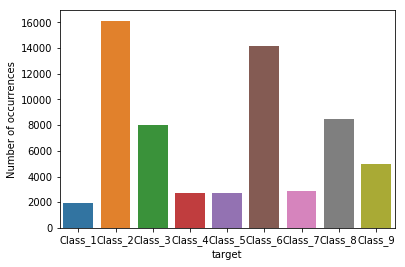

In [17]:
# Target 分布，看看各类样本分布是否均衡
sns.countplot(train["target"]);
pyplot.xlabel('target');
pyplot.ylabel('Number of occurrences');

In [18]:
# 将类别字符串变成数字
# drop ids and get labels
y_train = train["target"]
y_train = y_train.map(lambda s: s[6:])
y_train = y_train.map(lambda s: int(s)-1)

train = train.drop(["id", "target"], axis=1)
X_train = np.array(train)
X_train

array([[ 1,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  3, 10,  0],
       [ 0,  0,  0, ...,  0,  2,  0]])

In [19]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

# 初始化特征的标准化器
ss_X = StandardScaler()

# 分别对训练和测试数据的特征进行标准化处理
X_train = ss_X.fit_transform(X_train)
X_train

/usr/local/python36/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.40209324, -0.21010603, -0.30716546, ..., -0.12951551,
        -0.38693809, -0.10496314],
       [-0.25350808, -0.21010603, -0.30716546, ..., -0.12951551,
        -0.38693809, -0.10496314],
       [-0.25350808, -0.21010603, -0.30716546, ..., -0.12951551,
        -0.38693809, -0.10496314],
       ...,
       [-0.25350808, -0.21010603, -0.30716546, ..., -0.12951551,
        -0.38693809, -0.10496314],
       [ 0.40209324, -0.21010603, -0.30716546, ...,  1.33702606,
         9.792457  , -0.10496314],
       [-0.25350808, -0.21010603, -0.30716546, ..., -0.12951551,
         1.64894093, -0.10496314]])

正则化的 Logistic Regression及参数调优

logistic回归的需要调整超参数有：C（正则系数，一般在log域（取log后的值）均匀设置候选参数）和正则函数penalty（L2/L1） 目标函数为：J = sum(logloss(f(xi), yi)) + C* penalty

在sklearn框架下，不同学习器的参数调整步骤相同： 设置候选参数集合 调用GridSearchCV 调用fit


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#需要调优的参数
# 请尝试将L1正则和L2正则分开，并配合合适的优化求解算法（slover）
#tuned_parameters = {'penalty':['l1','l2'],
#                   'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
#                   }
penaltys = ['l1','l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tuned_parameters = dict(penalty = penaltys, C = Cs)

lr_penalty= LogisticRegression()
grid= GridSearchCV(lr_penalty, tuned_parameters,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
# view the complete results (list of named tuples)
grid.cv_results_

/usr/local/python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/python36/lib/python3.6/site-p

{'mean_fit_time': array([  2.21990261,   5.51592684,   5.20600352,   9.93461542,
         14.44186473,  12.06686239,  20.74866939,  15.96489239,
         28.79446039, 442.77799711,  33.65370517,  20.3967514 ,
         34.36213045,  22.32033634]),
 'std_fit_time': array([2.53731363e-01, 6.62370315e-01, 4.18990265e-02, 7.40015778e-01,
        2.18400331e+00, 1.02623015e-01, 4.55116171e-01, 2.01857130e-01,
        1.35627390e+00, 8.43726804e+02, 9.85466341e-01, 8.01805960e-01,
        2.09228885e+00, 1.50442454e+00]),
 'mean_score_time': array([0.01502142, 0.00474076, 0.00452847, 0.00521445, 0.00377698,
        0.00357852, 0.00326142, 0.00339308, 0.00351062, 0.00390954,
        0.00367036, 0.00352483, 0.00384369, 0.00404291]),
 'std_score_time': array([0.02072245, 0.00070662, 0.00067741, 0.00196815, 0.00050215,
        0.0002895 , 0.00029072, 0.00031112, 0.00025664, 0.00051445,
        0.00054348, 0.00025263, 0.00040718, 0.00060251]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.0

In [22]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.7547593652024952
{'C': 100, 'penalty': 'l2'}


如果最佳值在候选参数的边缘，最好再尝试更大的候选参数或更小的候选参数，直到找到拐点。

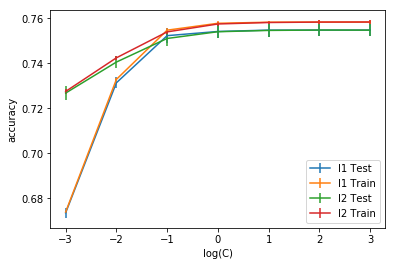

In [23]:
pd.DataFrame(grid.cv_results_).to_csv('LogisticGridSearchCV_Otto.csv')

# plot CV误差曲线
test_means = grid.cv_results_[ 'mean_test_score' ]
test_stds = grid.cv_results_[ 'std_test_score' ]
train_means = grid.cv_results_[ 'mean_train_score' ]
train_stds = grid.cv_results_[ 'std_train_score' ]


#cvresult = pd.DataFrame.from_csv('LogisticGridSearchCV_Otto.csv')
#test_means = cv_results['mean_test_score']
#test_stds = cv_results['std_test_score'] 
#train_means = cvresult['mean_train_score']
#train_stds = cvresult['std_train_score'] 

# plot results
number_C = len(Cs)
number_penaltys = len(penaltys)
test_scores = np.array(test_means).reshape(number_C,number_penaltys)
train_scores = np.array(train_means).reshape(number_C,number_penaltys)
test_stds = np.array(test_stds).reshape(number_C,number_penaltys)
train_stds = np.array(train_stds).reshape(number_C,number_penaltys)

x_axis = np.log10(Cs)
for i, value in enumerate(penaltys):
    #pyplot.plot(log(Cs), test_scores[i], label= 'penalty:'   + str(value))
    pyplot.errorbar(x_axis, test_scores[:,i], yerr=test_stds[:,i] ,label = penaltys[i] +' Test')
    pyplot.errorbar(x_axis, train_scores[:,i], yerr=train_stds[:,i] ,label = penaltys[i] +' Train')
    
pyplot.legend()
pyplot.xlabel( 'log(C)' )                                                                                                      
pyplot.ylabel( 'accuracy' )
pyplot.savefig('LogisticGridSearchCV_C.png' )

pyplot.show()

上图给出了L1正则和L2正则下、不同正则参数C对应的模型在训练集上测试集上的正确率（score）。可以看出在训练集上C越大（正则越少）的模型性能越好；但在测试集上当C=100时性能最好（L1正则和L2正则均是）


In [24]:
#用LogisticRegressionCV实现正则化的 Logistic Regression

from sklearn.linear_model import LogisticRegressionCV

Cs = [1, 10,100,1000]

# 大量样本（7W）、高维度（93），L1正则 --> 可选用saga优化求解器(0.19版本新功能)
lr_cv = LogisticRegressionCV(Cs=Cs, cv = 5, penalty='l1', solver='liblinear', multi_class='ovr')
lr_cv.fit(X_train, y_train)    

lr_cv.scores_

{0: array([[0.97148166, 0.97156245, 0.97156245, 0.97156245],
        [0.97002505, 0.97010584, 0.97010584, 0.97010584],
        [0.97171946, 0.97163866, 0.97163866, 0.97163866],
        [0.97285068, 0.97285068, 0.97285068, 0.97285068],
        [0.97219303, 0.97219303, 0.9721122 , 0.9721122 ]]),
 1: array([[0.84141218, 0.84133139, 0.84125061, 0.84125061],
        [0.8409146 , 0.84115698, 0.84115698, 0.84115698],
        [0.84276018, 0.84243697, 0.84219457, 0.84219457],
        [0.843649  , 0.8438106 , 0.8438106 , 0.8438106 ],
        [0.84398998, 0.84374747, 0.84358581, 0.84358581]]),
 2: array([[0.87825174, 0.8784941 , 0.8784941 , 0.8784941 ],
        [0.87589884, 0.87597964, 0.87589884, 0.87589884],
        [0.87467679, 0.8749192 , 0.8749192 , 0.8749192 ],
        [0.87322237, 0.87322237, 0.87322237, 0.87322237],
        [0.87575782, 0.87616199, 0.87640449, 0.87640449]]),
 3: array([[0.95774762, 0.95766683, 0.95766683, 0.95766683],
        [0.95855215, 0.95847136, 0.95847136, 0.9584713